# Grid Optimization Analysis
Create some visualizations of the Grid Optimization dataset to get a better idea of it.

In [27]:
import numpy as np
import qcportal as ptl
from matplotlib import pyplot as plt
from sklearn import decomposition


## Loading the Data

In [2]:
CLIENT = ptl.FractalClient()
DATASET = CLIENT.get_collection('GridOptimizationDataset',
                                'OpenFF Trivalent Nitrogen Set 1')
MOLECULE_IDS = [
    DATASET.get_entry(index).initial_molecule for index in DATASET.df.index
]
MOLECULES = CLIENT.query_molecules(id=MOLECULE_IDS)
METADATA_ENTRIES = [
    DATASET.get_entry(index).object_map['default'] for index in DATASET.df.index
]
# get all grid optimization calculations from the entire dataset
ENTRIES = CLIENT.query_procedures(METADATA_ENTRIES)


In [3]:
print(f"There are {len(MOLECULES)} molecules.")


There are 311 molecules.


## Sample Molecule
Demonstrating procedures for accessing data from a single molecule.

In [4]:
#try looking at a single entry (one full grid optimization calculation which should include restrained 21 optimizations)
print(ENTRIES[0].keywords.scans[0].__dict__)

{'type': <ScanTypeEnum.dihedral: 'dihedral'>, 'indices': [15, 27, 0, 14], 'steps': [-40.0, -36.0, -32.0, -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], 'step_type': <StepTypeEnum.absolute: 'absolute'>}


In [15]:
#get the final energies for each frame in a single grid optimization
ENTRIES[0].get_final_energies()

{(10,): -1911.9001278126004,
 (9,): -1911.8998668413578,
 (11,): -1911.900072169928,
 (12,): -1911.8996861616613,
 (8,): -1911.8992847580846,
 (7,): -1911.8983678870145,
 (13,): -1911.8989534927564,
 (6,): -1911.897087485602,
 (14,): -1911.8978416425014,
 (15,): -1911.8963109706997,
 (5,): -1911.895421144429,
 (16,): -1911.8943138832476,
 (4,): -1911.8933050495111,
 (17,): -1911.8917783017384,
 (3,): -1911.8906874902902,
 (2,): -1911.887483367938,
 (18,): -1911.8886343140744,
 (1,): -1911.883631816466,
 (19,): -1911.8848299692154,
 (20,): -1911.8803028912332,
 (0,): -1911.8790917811912}

In [6]:
# These show the job ids for each optimization in the original grid optimization entry.
# We can use these optimization ids to access the final geometries.
print(ENTRIES[0].get_final_molecules())

{(0,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='ef76b9c')>, (1,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='855e1d2')>, (10,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='b913b20')>, (11,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='b49e98a')>, (12,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='f7485a2')>, (13,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='2921064')>, (14,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='5fd4f58')>, (15,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='3444934')>, (16,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='2584cd5')>, (17,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='6131ad6')>, (18,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='d012dce')>, (19,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='7cf6e2e')>, (2,): <Molecule(name='BC14F5H5NS2' formula='BC14F5H5NS2' hash='1b30b25')>, (20,): <Molecu

In [7]:
# This will print the final geometry for the first optimization.
optimization_to_molecule = ENTRIES[0].get_final_molecules()
print(optimization_to_molecule[(0,)])


    Geometry (in Angstrom), charge = 0.0, multiplicity = 1:

       Center              X                  Y                   Z       
    ------------   -----------------  -----------------  -----------------
    B                 1.116566429148    -1.449331842082     0.038857279197
    C                -2.022805181162     0.145807696904    -1.350758229729
    C                -0.662239978494     2.416548306132     0.529152609300
    C                -2.311335371664    -1.047432431416    -1.965399785046
    C                 0.181003010072     3.106690718792     1.349755904376
    C                 1.752095795159    -2.890435479176     0.187768419371
    C                -0.172340218532    -1.165544833932    -0.694166909739
    C                -0.795768888184     0.087166765903    -0.618253279710
    C                -0.172611040809     1.107782559598     0.186509484362
    C                 1.033497899145    -3.960537838709     0.729961765046
    C                 3.058525675706   

In [8]:
# Accessing Wiberg bond order.
wiberg = ENTRIES[0].get_final_results()[(
    0,)].extras["qcvars"]["WIBERG_LOWDIN_INDICES"]
num_atoms = len(optimization_to_molecule[(0,)].geometry)
wibergarray = np.array(wiberg).reshape(num_atoms, num_atoms)

# Gives two arrays with the indices of the atoms that correspond to the WBO.
print(np.where(wibergarray > 0.5))

# Gives the corresponding WBO.
print('t', wibergarray[np.where(wibergarray > 0.5)])


(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 17, 18,
       19, 20, 21, 21, 22, 22, 23, 24, 25, 26, 27]), array([ 5,  6, 15,  3,  7, 23,  4,  8, 24,  1, 21, 25,  2, 22, 26,  0,  9,
       10,  0,  7, 21,  1,  6,  8,  2,  7, 14,  5, 11, 16,  5, 12, 17,  9,
       13, 18, 10, 13, 19, 11, 12, 20,  8, 15, 22,  0, 14, 27,  9, 10, 11,
       12, 13,  3,  6,  4, 14,  1,  2,  3,  4, 15]))
t [0.9580679020004703 1.192733564643621  1.343158427124923
 1.752249415091952  1.3057978767307623 0.8511105000406407
 1.8171704354886504 1.2643454863838548 0.8508007032118409
 1.752249415091952  1.399222509943768  0.8805596283423672
 1.8171704354886504 1.3252510216515658 0.880793512697218
 0.9580679020004703 1.395723495247448  1.3931880219978017
 1.192733564643621  1.4306826175493745 1.2813428506561515
 1.3057978767307623 1.430682617549374

## Visualization

Get a better idea of what the data looks like using PCA.

In [9]:
len(ENTRIES)

311

In [35]:
# Create vectors of the energies
NUM_FRAMES = 21
ENERGIES = np.zeros(shape=(len(ENTRIES), NUM_FRAMES))
for idx, entry in enumerate(ENTRIES):
    final_energies = entry.get_final_energies()
    if len(final_energies) != NUM_FRAMES:
        print(f"Skipping molecule {idx} because it only has {len(final_energies)} frames")
        continue
    for frame_idx in range(NUM_FRAMES):
        ENERGIES[idx][frame_idx] = final_energies[(frame_idx,)]
    # Normalize the energies by subtracting the minimum energy
    min_energy = np.min(ENERGIES[idx])
    ENERGIES[idx] -= min_energy

# Apply PCA to reduce to 2d for plotting
pca_2d = decomposition.PCA(n_components=2)
ENERGIES_2D = pca_2d.fit_transform(ENERGIES)

Skipping molecule 66 because it only has 0 frames
Skipping molecule 83 because it only has 0 frames
Skipping molecule 84 because it only has 0 frames
Skipping molecule 85 because it only has 0 frames
Skipping molecule 138 because it only has 0 frames
Skipping molecule 141 because it only has 0 frames
Skipping molecule 157 because it only has 0 frames
Skipping molecule 160 because it only has 0 frames
Skipping molecule 175 because it only has 0 frames
Skipping molecule 193 because it only has 0 frames
Skipping molecule 204 because it only has 0 frames
Skipping molecule 218 because it only has 0 frames
Skipping molecule 236 because it only has 0 frames
Skipping molecule 242 because it only has 0 frames
Skipping molecule 252 because it only has 0 frames
Skipping molecule 277 because it only has 0 frames
Skipping molecule 279 because it only has 0 frames
Skipping molecule 286 because it only has 0 frames
Skipping molecule 298 because it only has 0 frames


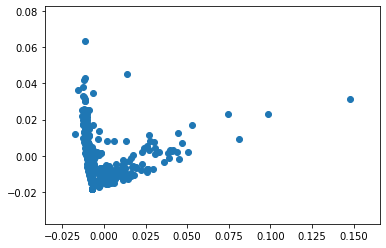

In [36]:
plt.scatter(ENERGIES_2D[:,0], ENERGIES_2D[:,1]);